In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download("stopwords")
import string
%matplotlib inline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('../input/spam-emails/data.csv')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.shape

(5728, 2)

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.shape

(5695, 2)

In [7]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
vals = data['spam'].value_counts()
data['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

<AxesSubplot:ylabel='spam'>

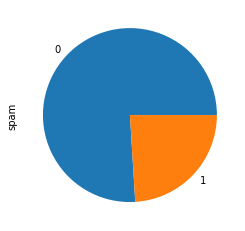

In [9]:
vals.plot(kind = 'pie')

In [10]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
ps = PorterStemmer()
lem = WordNetLemmatizer()

In [12]:
def func1(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return no_punc

In [13]:
def func2(text):
    stop_words = [word for word in text.split() if word not in stopwords.words('english')]
#     stop_words = ''.join(stop_words)
    return stop_words

In [14]:
def func3(text):
    stem_words = [word for word in text if ps.stem(word)]
    return stem_words

In [15]:
def func4(text):
    lem_words = [word for word in text if lem.lemmatize(word)]
    return lem_words

In [16]:
def func5(text):
    str_words = [word for word in text]
    str_words = ' '.join(str_words)
    return str_words

In [17]:
data['text'] = data['text'].str.lower()

In [18]:
data['text'] = data['text'].apply(func1)
data['text'] = data['text'].apply(func2)
data['text'] = data['text'].apply(func3)
data['text'] = data['text'].apply(func4)
data['text'] = data['text'].apply(func5)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


In [20]:
vect = CountVectorizer()

In [21]:
x = vect.fit_transform(data['text'])

In [22]:
x.shape

(5695, 37187)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, data['spam'], random_state=10)

In [25]:
xtrain.shape
xtest.shape

(1424, 37187)

In [26]:
classifier = MultinomialNB().fit(xtrain, ytrain)

In [27]:
pred = classifier.predict(xtrain)
predt = classifier.predict(xtest)

In [28]:
print(classification_report(ytrain, pred))
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3261
           1       0.99      1.00      0.99      1010

    accuracy                           1.00      4271
   macro avg       0.99      1.00      1.00      4271
weighted avg       1.00      1.00      1.00      4271

Confusion Matrix: 
 [[3252    9]
 [   4 1006]]
Accuracy: 
 0.9969562163427769


In [29]:
print(classification_report(ytest, predt))
print("Confusion Matrix: \n", confusion_matrix(ytest, predt))
print("Accuracy: \n", accuracy_score(ytest, predt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1066
           1       0.97      0.99      0.98       358

    accuracy                           0.99      1424
   macro avg       0.98      0.99      0.99      1424
weighted avg       0.99      0.99      0.99      1424

Confusion Matrix: 
 [[1055   11]
 [   2  356]]
Accuracy: 
 0.9908707865168539
